\begin{cases}
-\nabla^2 u(x, y) + Du(x, y) = f(x, y) & \text{for } (x, y) \in \Omega \\
u(x, y) + \gamma \frac{\partial u}{\partial n}(x, y) = 0 & \text{for } (x, y) \in \partial \Omega
\end{cases}

$$with : \frac{\partial u}{\partial \mathbf{n}} \quad = \quad \nabla u \cdot \mathbf{n} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_formats = ['svg']

$$ -( \frac{u_4 -2u_5 +u_6}{h_x^{2}}+ \frac{u_3 -2u_5 +u_1}{h_y^{2}}) +2u_5 \approx f_5  $$
$$ D = \frac{2}{h_x^{2}} + \frac{2}{h_x^{2}} +2$$

In [2]:
Lx = 1.0
Ly = 1.0
Nx = 11
Ny = 11
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
hx_square = dx**2
hy_square = dy**2

n = 4

D = 2 / hx_square + 2 / hy_square + 2

In [3]:
I = np.eye(n)
N = np.zeros((n, n))
M = np.zeros((n, n))
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            if i == 1:
                M[i, j] = -1 / hx_square
            elif i == 2:
                M[i, j] = -1 / hy_square
            else:
                M[i, j] = 0
        else:
            M[i, j] = 0

        if i == j:
            if i == 0 or i == 3:
                A[i, j] = 1
            elif i == 1 or i == 2:
                if j == 1 or j == 2:
                    A[i, j] = D
                else:
                    A[i, j] = -1 / hx_square
        elif abs(i - j) == 1:
            if i == 1 or i == 2:
                A[i, j] = -1 / hx_square

In [4]:
top_row = np.block([I, N, N])
middle_row = np.block([M, A, M])
bottom_row = np.block([N, N, I])
F = np.block([
    [top_row],
    [middle_row],
    [bottom_row]
])

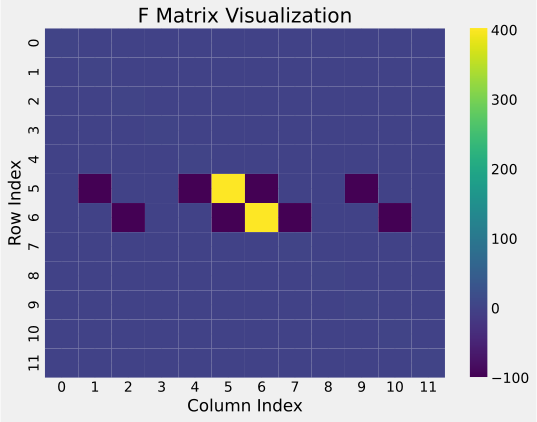

In [5]:
sns.heatmap(F, cmap='viridis')
plt.title('F Matrix Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

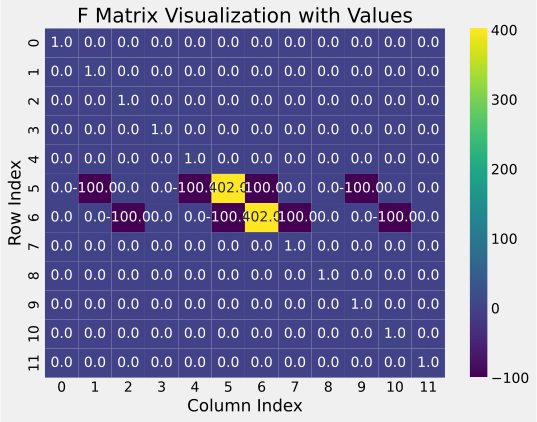

In [6]:
sns.heatmap(F, cmap='viridis', annot=True, fmt='.1f')
plt.title('F Matrix Visualization with Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [7]:
# u_0 = 0.0
# u_L = 2.0
f = lambda x: x**2

x = np.linspace(0, Lx, Nx+1)

b = f(x)
# b[0] = u_0
# b[-1] = u_L

u = np.linalg.solve(F, b)
solve_Fu_b = lambda b: np.linalg.solve(F, b)

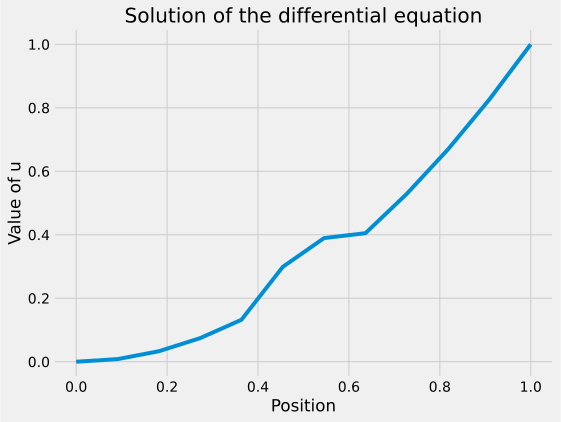

In [8]:
plt.plot(x, u)
plt.title('Solution of the differential equation')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.grid(True)
plt.show()

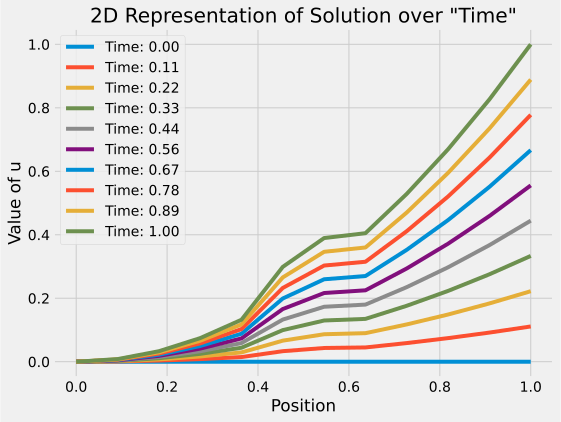

In [9]:
time_steps = np.linspace(0, 1, 10)
for t in time_steps:
    plt.plot(x, u * t, label=f'Time: {t:.2f}')

plt.title('2D Representation of Solution over "Time"')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.legend()
plt.grid(True)
plt.show()

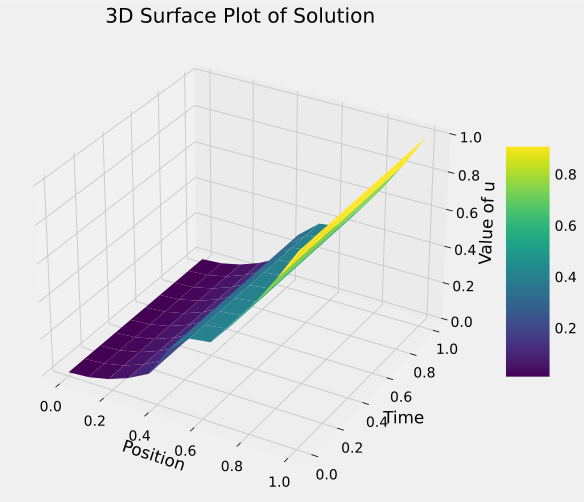

In [10]:
num_time_steps = 10
time_dimension = np.linspace(0, 1, num_time_steps)

u_3d = np.tile(u, (num_time_steps, 1))

x_3d, time_3d = np.meshgrid(x, time_dimension)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_3d, time_3d, u_3d, cmap='viridis')

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Value of u')
ax.set_title('3D Surface Plot of Solution')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [11]:
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
print(N)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
print(M)

[[   0.    0.    0.    0.]
 [   0. -100.    0.    0.]
 [   0.    0. -100.    0.]
 [   0.    0.    0.    0.]]


In [14]:
print(A)

[[   1.    0.    0.    0.]
 [-100.  402. -100.    0.]
 [   0. -100.  402. -100.]
 [   0.    0.    0.    1.]]


In [15]:
print(F)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.    0.]
 [   0.    0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]


In [16]:
print(b)

[0.         0.00826446 0.03305785 0.07438017 0.1322314  0.20661157
 0.29752066 0.40495868 0.52892562 0.66942149 0.82644628 1.        ]


In [17]:
print(f"Shape of I: {np.array(I).shape}")
print(f"Shape of N: {np.array(N).shape}")
print(f"Shape of M: {np.array(M).shape}")
print(f"Shape of A: {np.array(A).shape}")
print(f"Shape of F: {F.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of u: {u.shape}")

Shape of I: (4, 4)
Shape of N: (4, 4)
Shape of M: (4, 4)
Shape of A: (4, 4)
Shape of F: (12, 12)
Shape of b: (12,)
Shape of u: (12,)


In [18]:
print(u)

[0.         0.00826446 0.03305785 0.07438017 0.1322314  0.29891108
 0.38963908 0.40495868 0.52892562 0.66942149 0.82644628 1.        ]


In [19]:
x_mesh, y_mesh = np.meshgrid(u, u)

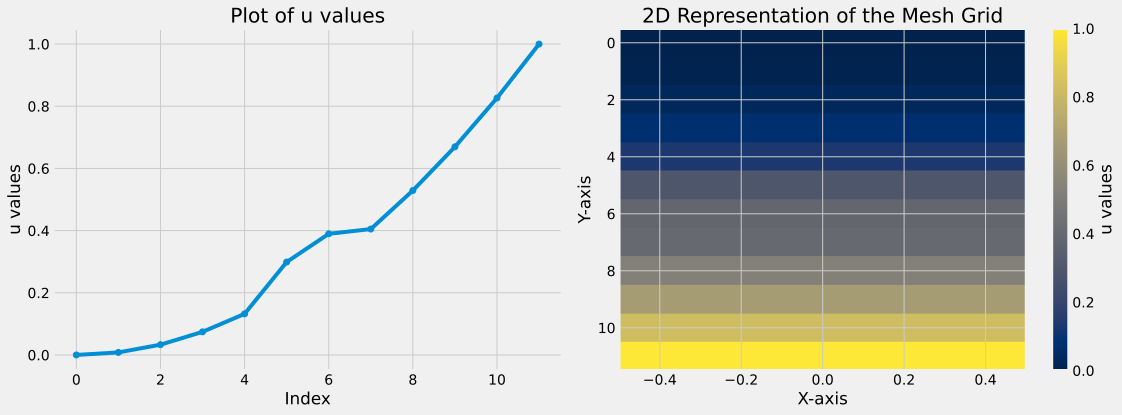

<Figure size 800x600 with 0 Axes>

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

indices = np.arange(len(u))
ax1.plot(indices, u, marker='o', linestyle='-')
ax1.set_xlabel('Index')
ax1.set_ylabel('u values')
ax1.set_title('Plot of u values')
ax1.grid(True)


im = ax2.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('2D Representation of the Mesh Grid')
plt.colorbar(im, ax=ax2, label='u values')

plt.tight_layout()
plt.show()

ax = fig.add_subplot(111, projection='3d')


indices = np.arange(len(u))
ax.plot(indices, np.zeros_like(u), u, marker='o', linestyle='-', label='Plot of u values')
ax.set_xlabel('Index')
ax.set_ylabel('Y-axis')
ax.set_zlabel('u values')
ax.legend()

extent = [0, len(u), 0, 1]
ax.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto', extent=extent, alpha=0)

plt.tight_layout()
plt.show()

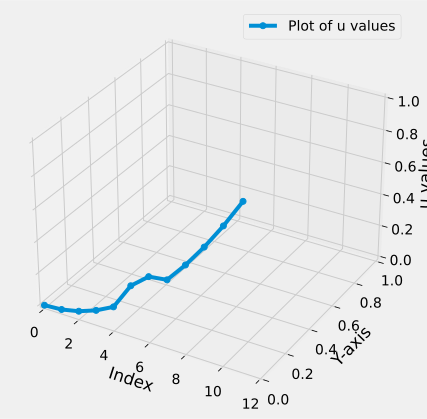

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

indices = np.arange(len(u))
ax.plot(indices, np.zeros_like(u), u, marker='o', linestyle='-', label='Plot of u values')
ax.set_xlabel('Index')
ax.set_ylabel('Y-axis')
ax.set_zlabel('u values')
ax.legend()

extent = [0, len(u), 0, 1]
ax.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto', extent=extent, alpha=0)

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame({'x':x , 'u':u , 'b':b })
csv_file_path = 'u.csv'
df.to_csv(csv_file_path , index=False)

In [24]:
df = pd.read_csv(csv_file_path)

In [25]:
from IPython.display import display
display(df)

,x,u,b
0,0.000000,0.000000,0.000000
1,0.090909,0.008264,0.008264
2,0.181818,0.033058,0.033058
3,0.272727,0.074380,0.074380
4,0.363636,0.132231,0.132231
5,0.454545,0.298911,0.206612
6,0.545455,0.389639,0.297521
7,0.636364,0.404959,0.404959
8,0.727273,0.528926,0.528926
9,0.818182,0.669421,0.669421


<Axes: ylabel='x'>

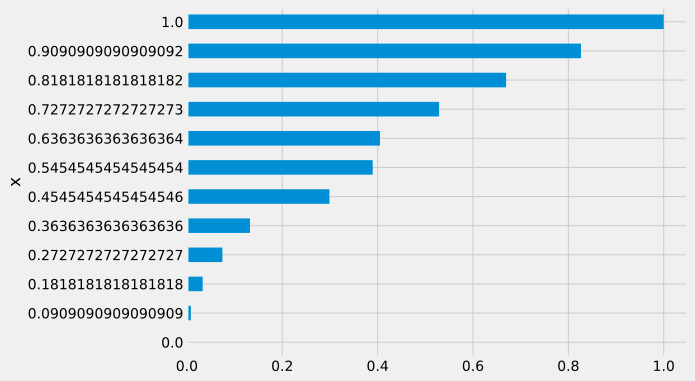

In [26]:
df.groupby('x').u.mean().sort_values().plot.barh()

<Axes: ylabel='Frequency'>

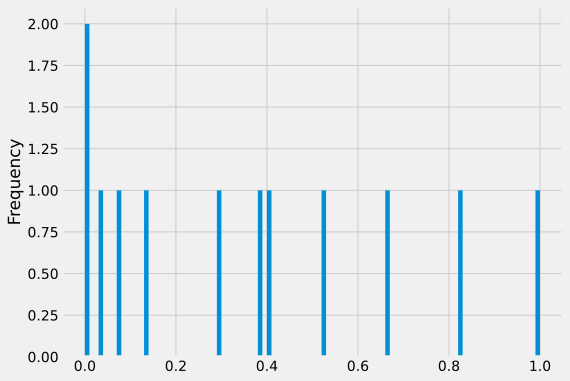

In [27]:
df.u.plot.hist(bins=100)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Frequency'>

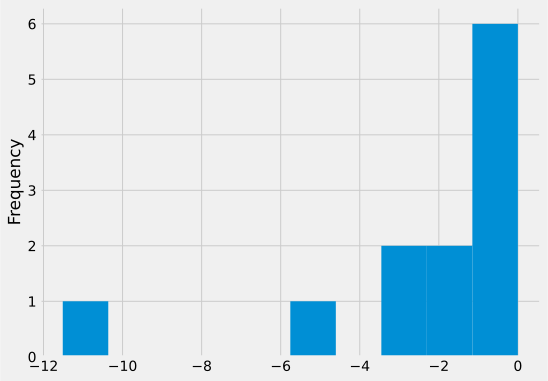

In [28]:
target = np.log(df['u'].abs())
epsilon = 1e-5
target = np.log(df['u'] + epsilon)
target.plot.hist()

<Axes: >

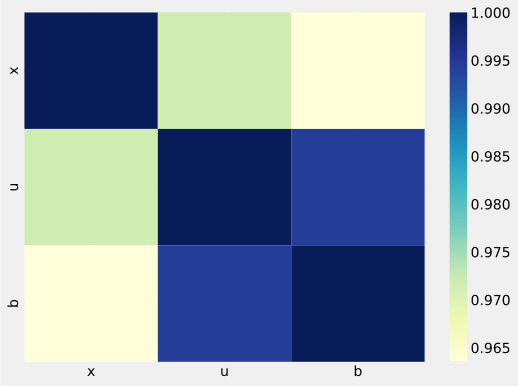

In [29]:
import seaborn as sns
sns.heatmap(df.corr() , cmap='YlGnBu')

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [31]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

x_train = train_data['x'].values.reshape(-1, 1)
u_train = train_data['u'].values.reshape(-1, 1)

scaler_x = MinMaxScaler()
scaler_u = MinMaxScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
u_train_scaled = scaler_u.fit_transform(u_train)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train_scaled, u_train_scaled, epochs=500, verbose=0)


# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# history = model.fit(x_train_scaled, u_train_scaled, epochs=500, verbose=0)

In [33]:
new_x = np.linspace(0, 1, 1000)

new_x_scaled = scaler_x.transform(new_x.reshape(-1, 1))

u_predicted_scaled = model.predict(new_x_scaled)
u_predicted = scaler_u.inverse_transform(u_predicted_scaled)

32/32 [==============================] - 0s 1ms/step


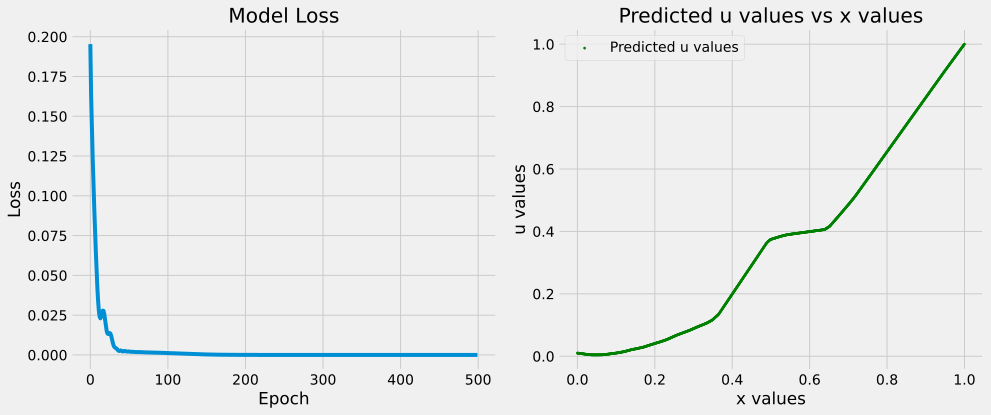

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(history.history['loss'])
axs[0].set_title('Model Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')

axs[1].scatter(new_x, u_predicted, color='g', label='Predicted u values', s=5)
axs[1].set_xlabel('x values')
axs[1].set_ylabel('u values')
axs[1].set_title('Predicted u values vs x values')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

x_test = new_x_scaled
u_test = u_predicted_scaled

u_train_predicted = model.predict(x_train)
u_test_predicted = model.predict(x_test)

mse_train = mean_squared_error(u_train, u_train_predicted)
mse_test = mean_squared_error(u_test, u_test_predicted)

r2_train = r2_score(u_train, u_train_predicted)
r2_test = r2_score(u_test, u_test_predicted)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R2 score: {r2_train}, Test R2 score: {r2_test}")

32/32 [==============================] - 0s 1ms/step
Train MSE: 0.0021634629095457964, Test MSE: 0.0
Train R2 score: 0.9754663962768052, Test R2 score: 1.0


In [37]:
x_pred = 1
y_pred = x_pred

y_pred_scaled = scaler_x.transform(np.array([y_pred]).reshape(-1, 1))
u_pred_scaled = model.predict(y_pred_scaled)
u_pred = scaler_u.inverse_transform(u_pred_scaled)

print(f"For x = {x_pred}, predicted u = {u_pred}")

1/1 [==============================] - 0s 21ms/step
For x = 1, predicted u = [[1.0002756]]


In [38]:
n_points = 1000
x = np.linspace(0, 1, n_points)
x_reshaped = x.reshape(-1, 1)
x_scaled = scaler_x.transform(x_reshaped)
u_scaled = model.predict(x_scaled)
u = scaler_u.inverse_transform(u_scaled)

32/32 [==============================] - 0s 1ms/step


In [39]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [40]:
delta_u = np.diff(u, axis=0)
delta_x = np.diff(x)

du_dx = delta_u / delta_x.reshape(-1, 1)


$$ \psi: \mathbb{R}^d \rightarrow \mathbb{R} $$

$$ \mathbf{n} = -\frac{\nabla \psi}{|\nabla \psi|} $$


In [41]:
norm_du_dx = np.linalg.norm(du_dx)
normal_vector = -du_dx / norm_du_dx
du_dn = du_dx*normal_vector

In [42]:
print(len(x), len(u), len(du_dx), len(normal_vector), len(du_dn))

1000 1000 999 999 999


In [43]:
x = np.ravel(x)[1:]
u = np.ravel(u)[1:]
du_dx = np.ravel(du_dx)
normal_vector = np.ravel(normal_vector)
du_dn = np.ravel(du_dn)

data = {
    'x': x,
    'u': u,
    'du_dx': du_dx,
    'normal_vector': normal_vector,
    'du_dn': du_dn
}

In [44]:
print(len(x), len(u), len(du_dx), len(normal_vector), len(du_dn))

999 999 999 999 999


In [45]:
df = pd.DataFrame(data)
csv_file_path = 'gamma.csv'
df.to_csv(csv_file_path , index=False)
df = pd.read_csv(csv_file_path)
df['gamma'] = -df['du_dn']/df['u']

In [46]:
from IPython.display import display
display(df)

,x,u,du_dx,normal_vector,du_dn,gamma
0,0.001001,0.010021,-0.125982,0.003250,-0.000409,0.040860
1,0.002002,0.009887,-0.133947,0.003456,-0.000463,0.046816
2,0.003003,0.009715,-0.171874,0.004434,-0.000762,0.078447
3,0.004004,0.009542,-0.172722,0.004456,-0.000770,0.080659
4,0.005005,0.009365,-0.177040,0.004567,-0.000809,0.086346
...,...,...,...,...,...,...
994,0.995996,0.993591,1.695069,-0.043730,-0.074125,0.074603
995,0.996997,0.995288,1.694950,-0.043727,-0.074115,0.074465
996,0.997998,0.996985,1.694890,-0.043725,-0.074109,0.074334
997,0.998999,0.998630,1.644158,-0.042416,-0.069739,0.069835


In [47]:
last_element = df.tail(1)
print(last_element)

       x         u    du_dx  normal_vector     du_dn     gamma
998  1.0  1.000276  1.64386      -0.042409 -0.069714  0.069695


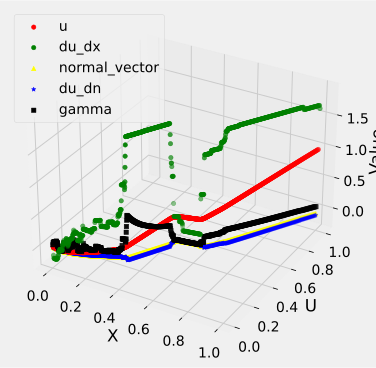

In [48]:
gamma = -du_dn / u

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, u, u, c='r', marker='o', label='u')
ax.scatter(x, u, du_dx, c='g', marker='o', label='du_dx')
ax.scatter(x, u, normal_vector, c='yellow', marker='^', label='normal_vector')
ax.scatter(x, u, du_dn, c='b', marker='*', label='du_dn')
ax.scatter(x, u, gamma, c='black', marker='s', label='gamma')

ax.set_xlabel('X')
ax.set_ylabel('U')
ax.set_zlabel('Value')

ax.legend()

plt.show()

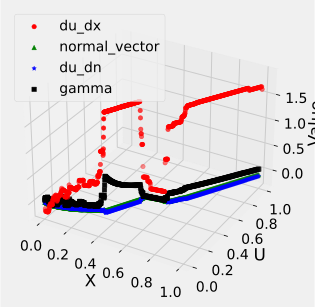

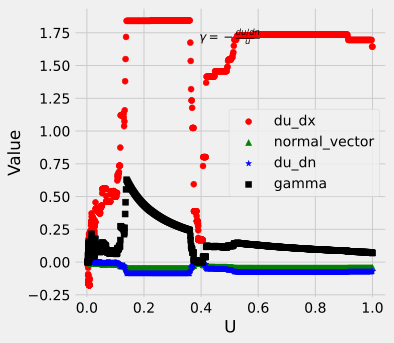

In [49]:
gamma = -du_dn / u

fig = plt.figure(figsize=(10, 5))

ax3d = fig.add_subplot(121, projection='3d')

ax3d.scatter(x, u, du_dx, c='r', marker='o', label='du_dx')
ax3d.scatter(x, u, normal_vector, c='g', marker='^', label='normal_vector')
ax3d.scatter(x, u, du_dn, c='b', marker='*', label='du_dn')
ax3d.scatter(x, u, gamma, c='black', marker='s', label='gamma')

ax3d.set_xlabel('X')
ax3d.set_ylabel('U')
ax3d.set_zlabel('Value')

ax3d.legend()

fig2 = plt.figure(figsize=(5, 5))

ax2d = fig2.add_subplot(111)

ax2d.scatter(u, du_dx, c='r', marker='o', label='du_dx')
ax2d.scatter(u, normal_vector, c='g', marker='^', label='normal_vector')
ax2d.scatter(u, du_dn, c='b', marker='*', label='du_dn')
ax2d.scatter(u, gamma, c='black', marker='s', label='gamma')

ax2d.set_xlabel('U')
ax2d.set_ylabel('Value')

ax2d.legend()

formula_text = r'$\gamma = -\frac{du/dn}{u}$'
ax2d.text(0.5, 0.9, formula_text, ha='center', va='center', transform=ax2d.transAxes, fontsize=12)

plt.show()

<Axes: ylabel='Frequency'>

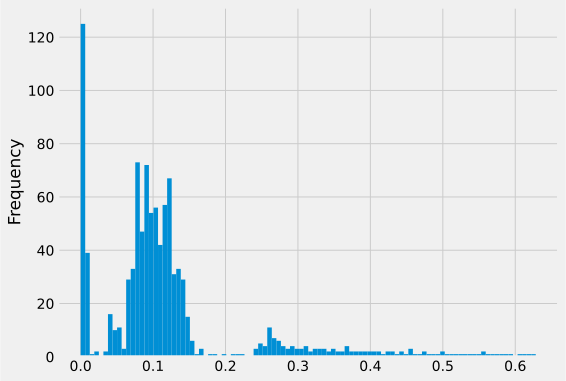

In [50]:
df.gamma.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

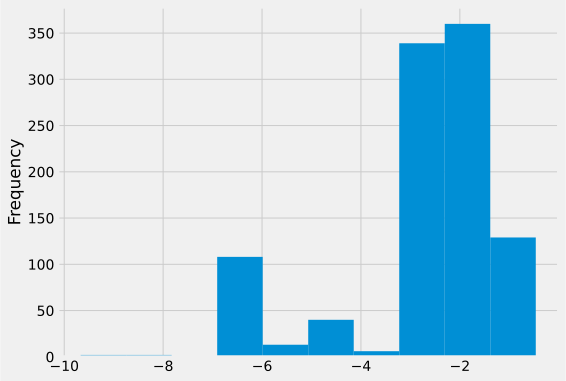

In [51]:
target = np.log(df['gamma'].abs())
epsilon = 1e-5
target = np.log(df['gamma'] + epsilon)
target.plot.hist()

<Axes: >

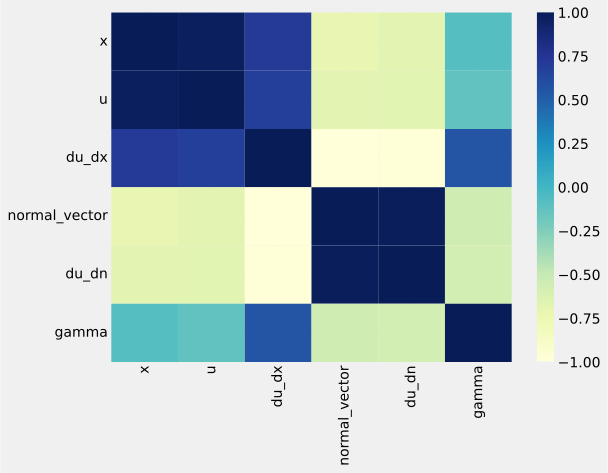

In [52]:
sns.heatmap(df.corr() , cmap='YlGnBu')

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu' , input_shape=(1,)),
    tf.keras.layers.Dense(64 ,activation='relu'),
    tf.keras.layers.Dense(64 ,activation='relu'),
    tf.keras.layers.Dense(64 ,activation='relu'),
    tf.keras.layers.Dense(64 ,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [55]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# def mean_loss(y_true , y_pred):
#   return tf.reduce_mean(tf.square(y_true-y_pred))
model.compile(optimizer='adam' , loss='mean_squared_error')
x_train = df['x'].values
y_train = df['gamma'].values
model.fit(x_train,y_train, epochs=500 , batch_size=32)

Epoch 1/500
32/32 [==============================] - 2s 3ms/step - loss: 0.0149
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/500
32/32 [=================

In [56]:
x_pred = np.linspace(0,1,1000)
y_pred = model.predict(x_pred)

32/32 [==============================] - 0s 1ms/step


In [60]:
# def mean_loss(y_true, y_pred):
#     return tf.reduce_mean(tf.square(y_true - y_pred))

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(optimizer=optimizer, loss=mean_loss)

In [61]:
loss_values = []

epochs = 1000
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        loss = model.train_on_batch(x_batch, y_batch)
    loss_values.append(loss)

32/32 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): tf.Tensor(0.02497496282976881, shape=(), dtype=float64)


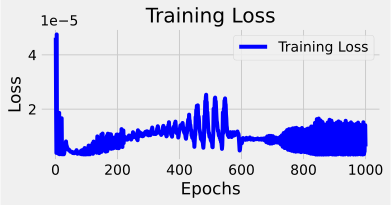

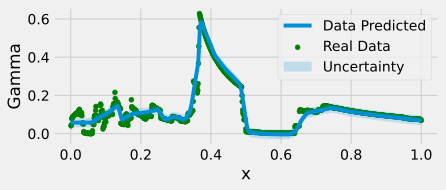

In [65]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 2)
plt.plot(range(1, epochs + 1), loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

def mean_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

mse = mean_loss(y_train, model.predict(x_train))
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 2)
plt.plot(x_pred, y_pred, '-', label='Data Predicted')
plt.scatter(x_train, y_train, s=25, c='g', label='Real Data')
plt.fill_between(x_pred, y_pred[:,0] - mse, y_pred[:,0] + mse, alpha=0.2, label='Uncertainty')
plt.xlabel('x')
plt.ylabel('Gamma')
plt.legend()

plt.tight_layout()
plt.show()

$$
\gamma (x) = Model_{predict}
$$


In [68]:
x_pred = np.array([0.37])
x_pred_reshaped = x_pred.reshape(-1, 1)

y_pred = model.predict(x_pred_reshaped)

print(f"For x = {x_pred}, predicted : gamma = {y_pred}")

1/1 [==============================] - 0s 33ms/step
For x = [0.37], predicted : gamma = [[0.5182031]]
